# Website: <a href="https://math.bme.hu/~marcessz">math.bme.hu/~marcessz</a>

Oktatás/Teaching $\rightarrow$ Alkalmazott sztochasztika labor/Applied stochastics lab $\rightarrow$ Exercises & Solutions $\rightarrow$ Lab 1

# Lab 1
## Triangle containment phase transition in the Erdős-Rényi random graph G(*n*, _M_).

### **[Erdős-Rényi](https://en.wikipedia.org/wiki/Erd%C5%91s%E2%80%93R%C3%A9nyi_model) random graph:**

#### **Two variants:**
* __G(n, M)__: a graph is chosen uniformly at random from the collection of all graphs which have _n_ nodes and *M* edges. <br>
    In this lab we will generate G(n, M) random graphs by adding M random edges to an empty graph. 
* __G(n, p)__: a graph is constructed by connecting nodes randomly, namely each edge is included in the graph with probability p independently of every other edge.

The expected number of edges in G(n, p) is $\binom{n}{2}p$, and by the [law of large numbers](https://en.wikipedia.org/wiki/Law_of_large_numbers) any graph in G(n, p) will almost surely have approximately this many edges (provided the expected number of edges tends to infinity). Therefore, a rough heuristic is that if $pn^2 \rightarrow \infty$, then G(n,p) should behave similarly to G(n, M) with $M=\binom{n}{2}p$ as n increases.

![random_graph](https://www.researchgate.net/profile/Neville_Curtis2/publication/313854183/figure/fig10/AS:463976178950150@1487631949714/Erdoes-Renyi-model-of-random-graph-evolution_W640.jpg)

### **Goal of this lab:**

The goal of this lab is to investigate when (after how many steps) the first triangle appears in G(n, M). To this end, we start with an empty graph G, and we keep adding random edges to G until a triangle appears. We repeat this procedure several times and note when the first triangle appeared. Finally, we study the distribution of the number of edges in G, i.e. the number of (random) edges required to form a trianlge in G. <br>
Note that later in this course we will investigate other properties of this model such as [connectivity](http://mathworld.wolfram.com/ConnectedGraph.html).

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
from collections import Counter
import pandas as pd

### For graph generation, we will use the **NetworkX** python module
#### Documentation: https://networkx.github.io/documentation/stable/#
#### Tutorial: https://networkx.github.io/documentation/stable/tutorial.html

#### Create an empty graph:

In [2]:
graph = nx.Graph()

In [3]:
type(graph)

networkx.classes.graph.Graph


#### Add (a list of) nodes to the graph:

In [4]:
graph.add_nodes_from(range(100))

#### Get the list of nodes and edges of a graph: 

In [5]:
graph.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99))

In [6]:
list(graph)

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99]

In [7]:
graph.edges

EdgeView([])

#### Add edges to the graph: 

##### A single edge:

In [8]:
graph.add_edge(0,1)

In [9]:
graph.edges()

EdgeView([(0, 1)])

##### A list of edges:

In [10]:
graph.add_edges_from([(1, 2), (1, 3)])

In [11]:
graph.edges()

EdgeView([(0, 1), (1, 2), (1, 3)])

# Goal 

We need a function, which 
1. first starts with en empty graph
2. Then in each step it adds a random edge to the graph, until the first triangle appears
3. After the first triangle appeared, the function stops and returns the number of edges of the constructed graph

__Idea__

In the beginning there is no triangle in the graph obviously, so it is enough to check whether the newly added edge creates a trianlge or not.

## __Exercise 1__
### Implement a function that generates a [simple](http://mathworld.wolfram.com/SimpleGraph.html) random graph by adding $M$ random edges to an [empty graph](http://mathworld.wolfram.com/EmptyGraph.html) on $n$ nodes. 
### Let the number of nodes $n$, and the number of edges $M$ be the parameters of the function

Some useful built-in functions:
* [nx.empty_graph](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.classic.empty_graph.html#networkx.generators.classic.empty_graph)
* [random.choice](https://pynative.com/python-random-choice/) or [random.choices](https://docs.python.org/3/library/random.html)
* [nx.complete_graph](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.classic.complete_graph.html)
* [Graph.has_edge(u,v)](https://networkx.github.io/documentation/stable/reference/classes/generated/networkx.Graph.has_edge.html)

You can draw your graphs with [nx.draw](https://networkx.github.io/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw.html#networkx.drawing.nx_pylab.draw)

### Solutions 

In [3]:
def create_graph(number_of_nodes, number_of_edges):
    graph = nx.Graph()
    
    # Create an empty graph with number_of_nodes nodes
    graph.add_nodes_from(range(number_of_nodes))
    
    # Add number_of_edges random edge to the graph
    # The number of edges must be less than n*(n-1)/2
    for _ in range(number_of_edges):
        # Select the endpoints of the new edge randomly
        edge = random.choices(list(graph.nodes), k=2)
        
        # If the new edge is a loop or it is already present in the graph, then select other endpoints.
        while (edge[0]==edge[1]) or graph.has_edge(edge[0], edge[1]):             
            edge = random.choices(list(graph.nodes), k=2)
        
        # Else: add the edge to the graph                          
        graph.add_edge(edge[0], edge[1])
    return graph 

In [4]:
def create_graph_2(number_of_nodes, number_of_edges):

    # Create an empty graph on graph_size nodes
    graph = nx.empty_graph(number_of_nodes)
    
    # All the possible simple edges in a graph of graph_size nodes
    possible_edges = set(nx.complete_graph(number_of_nodes).edges)
    
    # Add number_of_edges random edge to the graph
    for _ in range(number_of_edges):
        # Select an edge randomly from the possible_edges set
        random_edge = random.choice(list(possible_edges))
        
        # Add the edge to the graph
        graph.add_edge(*random_edge) # it's the same as graph.add_edge(random_edge[0], random_edge[1])
        
        # Delete the edge from the possible_edges set
        possible_edges -= {random_edge}
    
    return graph

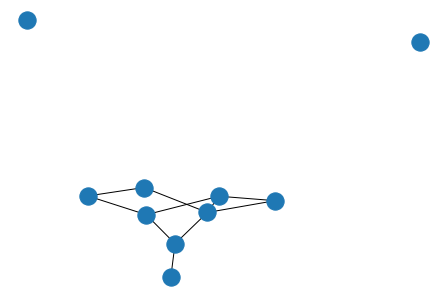

In [9]:
nx.draw(create_graph_2(10,10))

# __Exercise 2__
### Implement a function, which examines whether the newly added edge creates a triangle or not.  
#### This function should have two input parameters: a graph $G$ and an edge $(u, v)$ that is an edge of $G$. The function should return a boolean variable, which indicades whether the $(u, v)$ edge is contained in a triangle in $G$ or not.  

Some useful built-in functions:
* [Graph.neighbors(v)](https://networkx.github.io/documentation/stable/reference/classes/generated/networkx.Graph.neighbors.html)
* [Graph.has_edge(u,v)](https://networkx.github.io/documentation/stable/reference/classes/generated/networkx.Graph.has_edge.html)

You can test your function for example with [nx.complete_graph](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.classic.complete_graph.html), [nx.cycle_graph](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.classic.cycle_graph.html), and [nx.empty_graph](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.classic.empty_graph.html#networkx.generators.classic.empty_graph)

In [10]:
def has_triangle(graph, edge):
    
    # It is enough to check the neighbors of an endpoint of the edge.
    for node in graph.neighbors(edge[0]):
        
        # If a neighbor of u is also connected to v then (u, v) is in a triangle. 
        if graph.has_edge(node, edge[1]):
            return True

    return False

In [11]:
has_triangle(nx.complete_graph(10), (0,1))

True

In [12]:
has_triangle(nx.cycle_graph(10), (0,1))

False

## __Exercise 3__

#### With the help (and modification) of the previous functions, implement a function, which has one input parameter: the number of nodes. 
#### The function should start with an empty graph, and then keep adding random edges to it until the newly added edge forms a triangle. When it happens, then the function should return the number of edges of the created graph, i.e. the number of edges required to form a triangle. 

In [13]:
def first_triangle(number_of_nodes=100):
    # number_of_nodes has to be greater than 3
    
    graph = nx.empty_graph(number_of_nodes)
    possible_edges = set(nx.complete_graph(number_of_nodes).edges)
    number_of_edges = 0
    graph_has_triangle = False
 
    # While the graph is triangle-free:
    while not graph_has_triangle:
        
        # Add a random edge to the graph
        random_edge = random.choice(list(possible_edges))
        possible_edges -= {random_edge}
        graph.add_edge(*random_edge)
        number_of_edges +=1
        
        # Check whether the random_edge forms a triangle
        graph_has_triangle = has_triangle(graph, random_edge)

    return number_of_edges

In [36]:
first_triangle(100)

51